<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Computer_vision_and_CNN_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###what are CNN?
A Convolutional Neural Network (CNN) is a type of deep learning model that is especially good at analyzing images.

It works by automatically detecting important features (like edges, shapes, colors) from an image using convolutional layers, and then uses these features to classify or understand the image.

In [173]:
##.Computer vision library in Pytorch:
#[`torchvision`]-base doimin library for pytorch computer vision.
#[`torchvision.Datasets`]-get the dataset and data loading function for our computer vision.
#[`torchvision.models`]-get pretrained computer vision models that you can leverage for your own problem.
#[`torchvison.transforms`]-function for manipulating our vision Data (images) to be suitable for use with an ML model
#[`torch.utils.data.Dataset`]-Base dataset class for Pytorch.
#[`torch.utils.data.DataLoader`]-Creates a Python iterable over a dataset.

###Importing our Libraries:

In [174]:
#import Pytorch
import torch
from torch import nn
#Import TorchVision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
#import matplot for visualization
import matplotlib.pyplot as plt

###1.Getting A Computer Vision Dataset and checking its input and output Shape:

FashionMNIST from torchvision.datsets

In [175]:
#Setup up training data:
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
    download=True
)
#setup our Test data:
Test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
    download=True
)

In [176]:
len(train_data),len(Test_data)

(60000, 10000)

In [177]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [178]:
class_=train_data.classes
class_

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [179]:
index=train_data.class_to_idx
index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

##checking input and output shape:

In [180]:
print(f"Image Shape:{image.shape}->Colour channel,width,height|Ouput lables:{label}")

Image Shape:torch.Size([1, 28, 28])->Colour channel,width,height|Ouput lables:9


#visualize some random sample of Data:


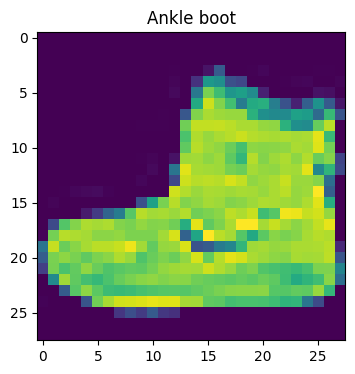

In [181]:
image,label=train_data[0]
plt.figure(figsize=(10,4))
plt.title(class_[label]);
plt.imshow(image.squeeze())

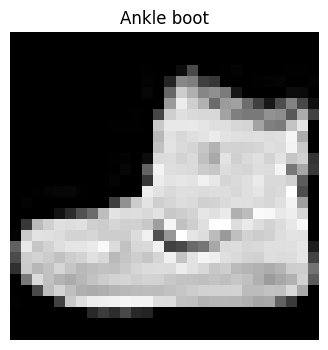

In [182]:
plt.figure(figsize=(10, 4))
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_[label])
plt.axis("off")
plt.show()

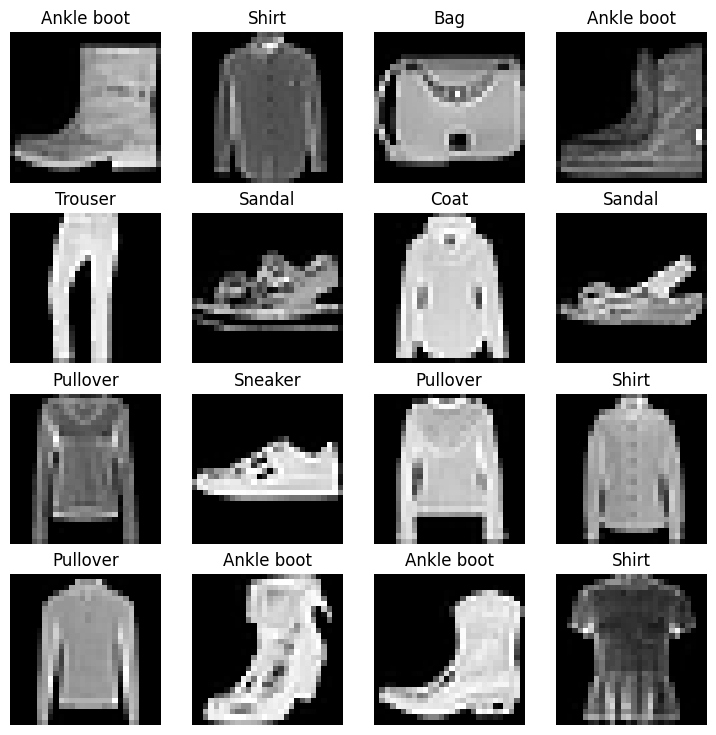

In [183]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  ran_idx=torch.randint(0,len(train_data),size=[1]).item()
  image,label=train_data[ran_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_[label])
  plt.axis("off")

###DataLoader Overview Understanding mini-Batch

In [184]:
#these clothing images could be modelled with pure straight lines or need any non-linear activation function??

###DataLoader converts the dataset into python iterable.. turning dataset into batches...(mini Batches)

why we do this??

#1.It is more computationally effecient as in your computing hardware may not be able to look at all the 60000 images at once.So we break it down to 32 images at a time...

#2.It gives our neural network more chances to update its gradients per epoch.

In [185]:
from torch.utils.data import DataLoader
#setup Hyperperamenter
train_Data_loader=DataLoader(dataset=train_data,
                       batch_size=32,
                       shuffle=True)
test_Data_loader=DataLoader(
    dataset=Test_data,
    batch_size=32,
    shuffle=False
)

In [186]:
print(f"Number of Train DataLoader:{len(train_Data_loader)} of size 32")
print(f"Number of Test DataLoader:{len(test_Data_loader)} of size 32")

Number of Train DataLoader:1875 of size 32
Number of Test DataLoader:313 of size 32


In [187]:
data_feature_sample,data_label_sample=next(iter(train_Data_loader))
data_feature_sample.shape,data_label_sample.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

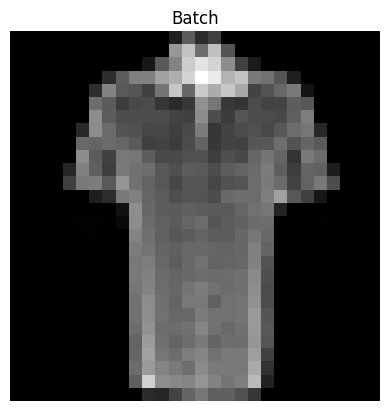

In [188]:
#show a sample Dataloader
torch.manual_seed(42)
random_index=torch.randint(0,len(data_feature_sample),size=[1]).item()
image,label=data_feature_sample[random_index] , data_label_sample[random_index]
plt.imshow(image.squeeze(),cmap="gray")
plt.title("Batch")
plt.axis("off")
plt.show()

#Creating a baseline model with two linear Layers

#We will first pass the train dataloader though flatten modle as we are building a model with two linear layer and linear modle cannot handle multifeature dataset.

In [189]:
#first Computer Vision model:
#starts simply and add complexity when necessary

#First we will create a flatten layer:
flatten_model=nn.Flatten()

#get a sample train data:
x=data_feature_sample[0]

#pass the data through flatten model:(Forward pass)
output=flatten_model(x)

#what we got  after passing the data past the flatten model:
print(f"Shape before flattening:{x.shape}->[color_channel,height,width]")
print(f"Shape after flattening:{output.shape}->[color_channel,height*width]")

Shape before flattening:torch.Size([1, 28, 28])->[color_channel,height,width]
Shape after flattening:torch.Size([1, 784])->[color_channel,height*width]


In [190]:
#model Building:
torch.manual_seed(42)
from torch import nn
class CNNfashion(nn.Module):
  def __init__(self,
               input_shape,
               hidden_layer,
               output_shape):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_layer),
        nn.Linear(in_features=hidden_layer,
                  out_features=output_shape)
        )

  def forward(self,x):
    return self.layer_stack(x)

model=CNNfashion(input_shape=784,
                 hidden_layer=10,
                 output_shape=len(class_))

model



CNNfashion(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

##loss_function and optimizer and Accuracy:

In [191]:
import requests
from pathlib import Path
if Path("helper_function.py").is_file():
  print("Already there")
else:
  print("Downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

Already there


In [192]:
#Accuracy:
from helper_function import accuracy_fn
#loss_function:
loss_function=nn.CrossEntropyLoss()
#optimizer:
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.1)

###creating a Function to time our modeling code:

In [193]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device="None"):
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


# start_time=timer()
# some code:
# end_time=timer()
# print_train_time(start=start_time,
#                  end=end_time,
#                  device="cpu")

#Training and Testing Loop for our Batch Data:

In [194]:
#the optimizer will update a model's paramter once per batch rather than once per epoch.

#Steps:
# 1.Loop through the epochs.
# 2.Loop through the training batch,perform the training steps, calculate the training loss per batch....
# 3.Loop through the testing batch,perform the testing steps, claculate the testing loss per batch...
# 4.Print out whats happening along with timer...

In [195]:
#better progress bar
from tqdm.auto import tqdm

#setting up manual seed
torch.manual_seed(42)

#start timer...
train_start_time=timer()

#number of epochs means 1857 batches of 32 images will run 3 times through our model:
epochs=3

#training and testing loop:
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch+1}\n-----")
  train_loss=0
  train_acc=0
  #Add a loop to loop through training the training batches:
  for batch,(X,y) in enumerate(train_Data_loader):
    model.train()
    y_pred=model(X)
    loss=loss_function(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #divide the  train_lodd  by the len of dataloader.
  train_loss/=len(train_Data_loader)
  train_acc/=len(train_Data_loader)

  test_loss=0
  test_acc=0
  model.eval()
  with torch.inference_mode():
    for X,y in test_Data_loader:
      test_pred=model(X)
      test_los=loss_function(test_pred,y)
      test_loss+=test_los
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    #calculate the test loss (average):
    test_loss/=len(test_Data_loader)
    test_acc/=len(test_Data_loader)

  #print out whats happeing:
  print(f"Training Loss: {loss:.4f} , Training Accuracy:{train_acc:4f} , Testing Loss: {test_loss:.4f} , Testing_Accuracy: {test_acc:.4f}")

train_end_time=timer()
total_time=print_train_time(start=train_start_time,
                            end=train_end_time,
                            device=str(next(model.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 1
-----
Training Loss: 0.4652 , Training Accuracy:79.171667 , Testing Loss: 0.5095 , Testing_Accuracy: 82.0387
epoch: 2
-----
Training Loss: 0.6015 , Training Accuracy:83.320000 , Testing Loss: 0.4799 , Testing_Accuracy: 83.1969
epoch: 3
-----
Training Loss: 0.3182 , Training Accuracy:84.051667 , Testing Loss: 0.4766 , Testing_Accuracy: 83.4265
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       requires_grad=True): 35.714 seconds


In [208]:
#now we will create evaluation function so that it can run for diffrent model:
def eval(model_=torch.nn.Module,
         data_loader=torch.utils.data.DataLoader,
         loss_fn=torch.nn.Module,
         accuracy_fn=None):
  model_.eval()
  loss=0
  accu=0
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred=model_(X)
      loss+=loss_fn(y_pred,y).item()
      accu+=accuracy_fn(y_true=y,
                y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    accu/=len(data_loader)

  return {"Model name":model_.__class__.__name__,
          "Model loss":loss,
          "Model accuracy":accu}

model_result=eval(model_=model,
     data_loader=test_Data_loader,
     loss_fn=loss_function,
     accuracy_fn=accuracy_fn)

print(model_result)

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model name': 'CNNfashion', 'Model loss': 0.47663889553981087, 'Model accuracy': 83.42651757188499}
